## Daily Challenge: NumPy, Pandas & Matplotlib Integration


**Objective:**
Apply your knowledge of NumPy, Pandas, and Matplotlib to analyze a real-world dataset. Utilize advanced statistical functions and array operations in NumPy, and integrate these with Pandas for data manipulation and Matplotlib for visualization.


### Data Import and Cleaning:

In [64]:

import urllib.request
import zipfile
import os
import pandas as pd

def download_ds(ds_url, file_path, extract_path=None):
    if not os.path.exists(file_path):
        with urllib.request.urlopen(ds_url) as response:
            print(f'Downloading %s' % ds_url.split('/')[-1])
            content = response.read()
            with open(file_path, 'wb') as f:
                f.write(content)
    
    if extract_path is None:
        extract_path = os.path.dirname(file_path)
    
    if file_path.endswith('.zip'):
        print(f'Extracting {file_path}')
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

# The unzip_ds function is no longer needed as its functionality
# is integrated into the download_and_extract_ds function

In [65]:
ds_url = 'https://wri-dataportal-prod.s3.amazonaws.com/manual/global_power_plant_database_v_1_3.zip'

file_path = 'datasets/%s' % ds_url.split('/')[-1]
dir_path = os.path.dirname(file_path)

if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    
download_ds(ds_url, file_path)


Extracting datasets/global_power_plant_database_v_1_3.zip


In [66]:
os.listdir(dir_path)


['A_Global_Database_of_Power_Plants.pdf',
 'Estimating_Power_Plant_Generation_in_the_Global_Power_Plant_Database.pdf',
 'global_power_plant_database.csv',
 'global_power_plant_database_v_1_3.zip',
 'README.txt',
 'RELEASE_NOTES.txt']

In [67]:
pd.set_option('display.max_columns', None)

df = pd.read_csv(os.path.join(dir_path, 'global_power_plant_database.csv'), low_memory=False)
df.head()

country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2 other_fuel3  commissioning_year owner      source  \
0         NaN         NaN                 NaN   NaN       GEODB   
1         NaN         NaN                 NaN   NaN  Wiki-Solar   
2         NaN         NaN                 NaN   NaN  Wiki-Solar   
3         NaN         NaN                 NaN   NaN       GEODB   
4         NaN         NaN                 NaN   NaN       GEODB   

                                  url geolocation_source  wepp_id  \
0  http://globalenergyobservatory.org              GEODB  1009793   
1          https://www.wiki-solar.org         Wiki-Solar      NaN   
2          https://www.wiki-solar.org         Wiki-Solar      NaN   
3  http://globalenergyobservatory.org              GEODB  1009795   
4  http://globalenergyobservatory.org              GEODB  1009797   

   year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
0                 2017.0                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2017.0                  NaN                  NaN   
4                 2017.0                  NaN                  NaN   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   generation_gwh_2018  generation_gwh_2019 generation_data_source  \
0                  NaN                  NaN                    NaN   
1                  NaN                  NaN                    NaN   
2                  NaN                  NaN                    NaN   
3                  NaN                  NaN                    NaN   
4                  NaN                  NaN                    NaN   

   estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
0                         123.77                         162.90   
1                          18.43                          17.48   
2                          18.64                          17.58   
3                         225.06                         203.55   
4                         406.16                         357.22   

   estimated_generation_gwh_2015  estimated_generation_gwh_2016  \
0                          97.39                         137.76   
1                          18.25                          17.70   
2                          19.10                          17.62   
3                         146.90                         230.18   
4                         270.99                         395.38   

   estimated_generation_gwh_2017 estimated_generation_note_2013  \
0                         119.50                       HYDRO-V1   
1                          18.29                SOLAR-V1-NO-AGE   


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

### Exploratory Data Analysis:



In [69]:
df.describe()


capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        17447.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           23.397835   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1988.000000   
50%       16.745000     39.727750     -2.127100         2007.000000   
75%       75.344250     46.263125     49.502675         2014.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count           14887.000000          6417.000000          7226.000000   
mean             2018.218849           592.696107           656.863891   
std                 1.606428          2174.833482          2231.464288   
min              2000.000000          -947.600000          -989.619000   
25%              2017.000000             1.947000             2.260000   
50%              2019.000000            23.426000            23.608500   
75%              2019.000000           199.706000           226.322250   
max              2019.000000         50834.000000         32320.917000   

       generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
count          8203.000000          9144.000000          9500.000000   
mean            762.368840           693.149763           661.834161   
std            2533.459828          2404.516759          2369.296957   
min            -864.428000          -768.620000          -934.944000   
25%               2.664500             2.729000             2.467000   
50%              26.142000            22.462389            17.876500   
75%             285.862583           249.866750           214.505150   
max           37433.607000         32377.477000         36448.643000   

       generation_gwh_2018  generation_gwh_2019  \
count          9637.000000          9659.000000   
mean            517.320785           423.922436   
std            1975.302686          1698.506485   
min            -982.622000          -780.339000   
25%               2.242000             2.751500   
50%              12.530000            11.530000   
75%             151.117000           122.781498   
max           35136.000000         31920.368000   

       estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
count                   16120.000000                   16503.000000   
mean                      239.112221                     242.431122   
std                      1191.258172                    1285.798297   
min                         1.120000                       0.870000   
25%                         8.620000                       8.680000   
50%                        27.620000                      28.250000   
75%                       106.805000                     106.980000   
max                     48675.060000                   58470.770000   

       estimated_generation_gwh_2015  estimated_generation_gwh_2016  \
count                   17050.000000                   17570.000000   
mean                      235.866067                     235.695265   
std                      1267.005223                    1259.559841   
min                         0.440000                       0.300000   
25%                         8.380000                       8.322500   
50%                        26.830000                      27.555000   
75%                       103.120000                     107.237500   
max                     57113.350000                   60859.730000   

       estimated_generation_gwh_2017  
count                   33138.000000  
mean                      716.443378  
std                      2484.361200  
min                         0.000000  
25%                         8.180000  
50%                        37.590000  
75%                       229.565000  


In [70]:
df.describe(include='object')


country              country_long           name     gppd_idnr  \
count    34936                     34936          34936         34936   
unique     167                       167          34528         34936   
top        USA  United States of America  Santo Antônio  GEODB0003803   
freq      9833                      9833              6             1   

       primary_fuel other_fuel1 other_fuel2 other_fuel3  \
count         34936        1944         276          92   
unique           15          12          11           8   
top           Solar         Oil         Gas         Gas   
freq          10665        1169         100          31   

                           owner                                  source  \
count                      20868                                   34921   
unique                     10144                                     866   
top     Cypress Creek Renewables  U.S. Energy Information Administration   
freq                         185                                    9789   

                                                 url  \
count                                          34918   
unique                                          4870   
top     http://www.eia.gov/electricity/data/browser/   
freq                                            9789   

                            geolocation_source  wepp_id  \
count                                    34517    16234   
unique                                      28    15263   
top     U.S. Energy Information Administration  1082676   
freq                                      9789       14   

                        generation_data_source estimated_generation_note_2013  \
count                                    11400                          34936   
unique                                      17                              5   
top     U.S. Energy Information Administration                  NO-ESTIMATION   
freq                                      9715                          18816   

       estimated_generation_note_2014 estimated_generation_note_2015  \
count                           34936                          34936   
unique                              5                              5   
top                     NO-ESTIMATION                  NO-ESTIMATION   
freq                            18433                          17886   

       estimated_generation_note_2016 estimated_generation_note_2017  
count                           34936                          34936  
unique                              5                              6  
top                     NO-ESTIMATION             CAPACITY-FACTOR-V1  
freq                            17366                          14942

In [71]:
df.isnull().sum()


country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


In [72]:
power_plants = df.groupby('country_long').size()
power_plants

country_long
Afghanistan         9
Albania             8
Algeria            59
Angola             14
Antarctica          2
                 ... 
Vietnam           236
Western Sahara      1
Yemen               7
Zambia             15
Zimbabwe            2
Length: 167, dtype: int64

Text(0.5, 1.0, 'Distribution of power plants')

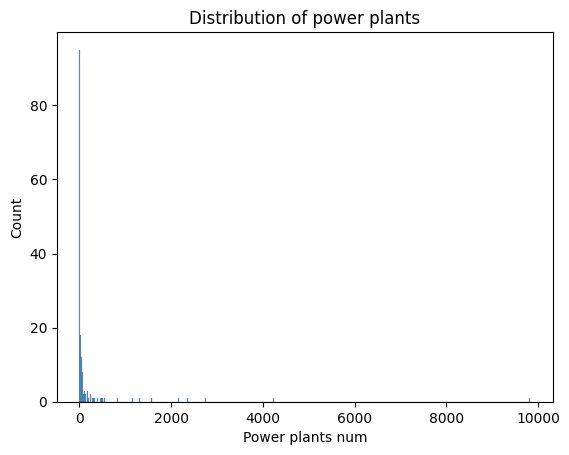

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(power_plants)
plt.xlabel('Power plants num')
plt.title('Distribution of power plants')


We observe here that there are majority of countries with fewer then 20 powerplants. \
And a few counties with enormous amount of powerplants (e.g. USA, China)

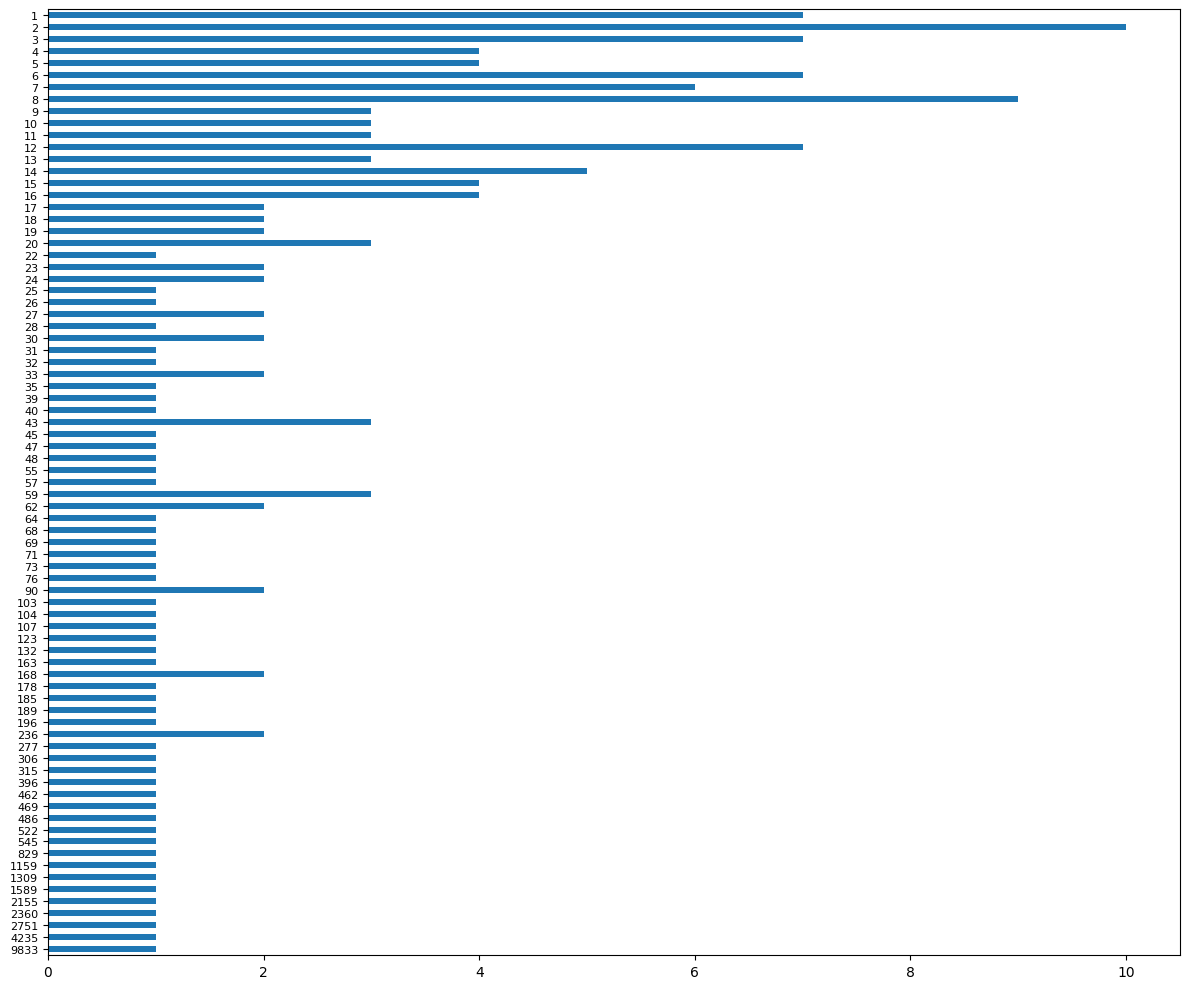

In [75]:
fig, ax = plt.subplots(figsize=(12, 10))
power_plants.value_counts().sort_index(ascending=False).plot.barh(ax=ax)
ax.tick_params(axis='y', labelsize=8) 
plt.tight_layout()


Text(0.5, 1.0, 'Log distribution of power plants')

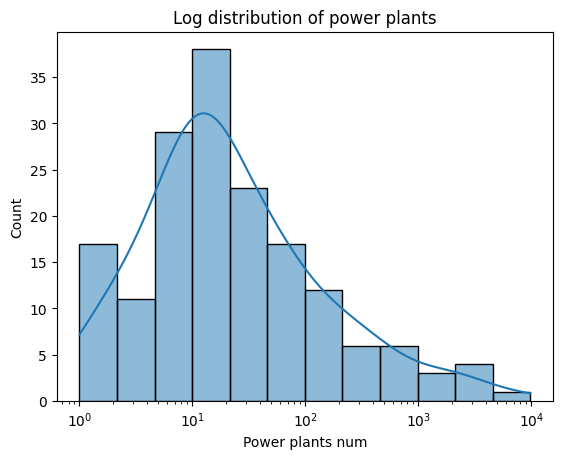

In [76]:
sns.histplot(power_plants, kde=True, log_scale=True)
plt.xlabel('Power plants num')
plt.title('Log distribution of power plants')


Here we can see that USA leads with a great margin even among countries with a large amount of power plants

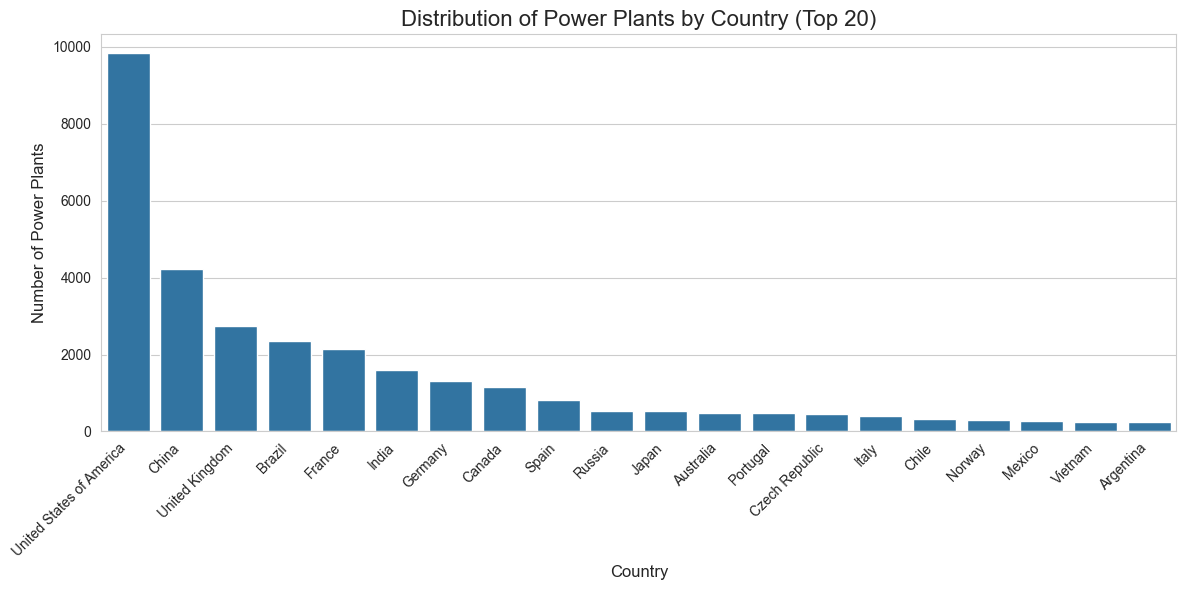

In [124]:
top_20_countries = df['country_long'].value_counts().iloc[:20].reset_index()
top_20_countries.columns = ['country', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_countries, x='country', y='count')

plt.title('Distribution of Power Plants by Country (Top 20)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Power Plants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [149]:
# Plot geographical distribution of power plants

import plotly.express as px

fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    hover_name='name',
    hover_data=['country_long'],
    color='primary_fuel',
    size='capacity_mw',
    size_max=25,
    zoom=1,
    height=800,
    title='Geographical Distribution of Power Plants',
    mapbox_style="carto-positron"
)



fig.show()


In [77]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [78]:
df.primary_fuel.value_counts()


primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

In [79]:
df.other_fuel1.value_counts()

other_fuel1
Oil             1169
Gas              383
Waste             97
Coal              85
Biomass           44
Storage           43
Solar             33
Other             32
Hydro             23
Petcoke           21
Cogeneration       7
Wind               7
Name: count, dtype: int64

It is suprising to see that Solar is the leading type of fuel among power plants

[]

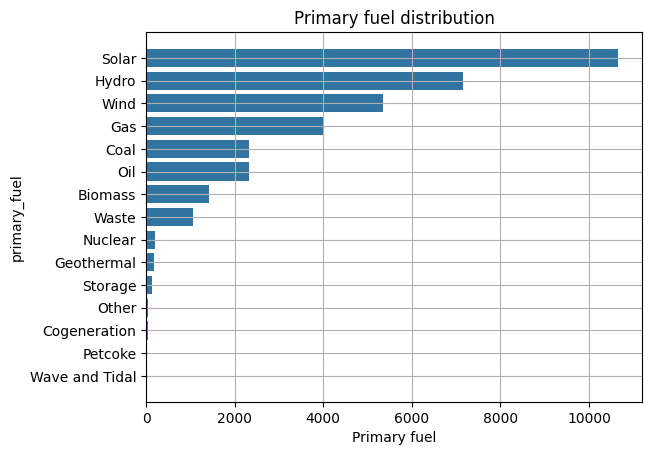

In [80]:
sns.barplot(df.primary_fuel.value_counts(), orient='h')
plt.grid()
plt.xlabel('Primary fuel')
plt.title('Primary fuel distribution')
plt.plot()


[]

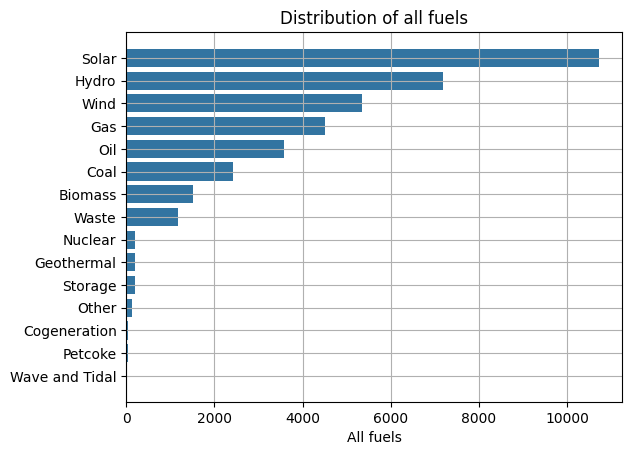

In [81]:
all_fuels = pd.concat([df.primary_fuel, df.other_fuel1, df.other_fuel2, df.other_fuel3], axis=0).value_counts()

sns.barplot(all_fuels, orient='h')
plt.grid()
plt.xlabel('All fuels')
plt.title('Distribution of all fuels')
plt.plot()


### Statistical Analysis

In [82]:
df.sample(10)


country              country_long                        name  \
31606     USA  United States of America   Prairie View I & II LFGTE   
9431      CZE            Czech Republic  Boletice Solar Power Plant   
8495      CHN                     China       Tieling power station   
15829     IRN                      Iran                Bandar Abbas   
20633     ESP                     Spain          P.E. FUENDETODOS I   
19505     RUS                    Russia          Novotroitskaya TPP   
24032     GBR            United Kingdom         Rew Farm Solar Farm   
4264      CAN                    Canada              Mother Earth I   
18877     PRT                  Portugal                        Nave   
6740      CHN                     China  Hubei Xingfu power station   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
31606  USA0054926          6.4   41.4936   -86.1658        Waste         NaN   
9431   WRI1029673          1.5   50.7381    14.1889        Solar         NaN   
8495   WRI1070603       2520.0   42.3450   123.8030         Coal         NaN   
15829  WRI1008119       1280.0   27.1467    56.1153          Oil         NaN   
20633  WRI1007050         46.0   41.3424    -0.9599         Wind         NaN   
19505  WRI1062072        172.0   51.2246    58.3641         Coal         Gas   
24032  GBR0001308          6.1   50.4189    -4.6895        Solar         NaN   
4264   CAN0008149          4.0   45.8185   -82.1428         Wind         NaN   
18877  WRI1023400         38.0   40.9395    -7.7717         Wind         NaN   
6740   WRI1070652        180.0   30.1919   112.6051         Coal         NaN   

      other_fuel2 other_fuel3  commissioning_year  \
31606         NaN         NaN              2000.5   
9431          NaN         NaN                 NaN   
8495          NaN         NaN              2002.0   
15829         NaN         NaN                 NaN   
20633         NaN         NaN              2004.0   
19505         NaN         NaN                 NaN   
24032         NaN         NaN                 NaN   
4264          NaN         NaN                 NaN   
18877         NaN         NaN              2007.0   
6740          NaN         NaN              2005.0   

                                owner                                  source  \
31606   Wabash Valley Power Assn  Inc  U.S. Energy Information Administration   
9431               FVE Boletice spol.                              Elektrarny   
8495      Jinshan Energy Stock Co Ltd                                    GCPT   
15829                             NaN                                 TAVANIR   
20633  IBERDROLA E.R. DE ARAGON  S.A.                 Red Eléctrica de España   
19505               OJSC "Ural Steel"                        EnergyBase (RUS)   
24032    Lightsource Renewable Energy   UK Renewable Energy Planning Database   
4264         Mere General Partner Inc                Natural Resources Canada   
18877                             NaN          Energias Endogenas de Portugal   
6740     Hubei Xingfu Industry Co Ltd                                    GCPT   

                                                     url  \
31606       http://www.eia.gov/electricity/data/browser/   
9431        http://www.elektrarny.pro/detail.php?id=1884   
8495      https://endcoal.org/global-coal-plant-tracker/   
15829  http://www2.tavanir.org.ir/info/stat87/sanatlh...   
20633  http://www.ree.es/en/statistical-data-of-spani...   
19505  https://energybase.ru/power-plant/novotroitska...   
24032  https://www.gov.uk/government/collections/rene...   
4264   ftp://ftp.maps.canada.ca/pub/nacei_cnaie/energ...   
18877                   http://e2p.inegi.up.pt/index.asp   
6740      https://endcoal.org/global-coal-plant-tracker/   

                           geolocation_source  wepp_id  year_of_capacity_data  \
31606  U.S. Energy Information Administration    14541                 2019.0   
9431                           Industry Abou

In [125]:
import numpy as np

fuel_po_group = df.groupby('primary_fuel')['capacity_mw']
fuel_po = fuel_po_group.agg(['mean', 'std', 'min', 'max', 'median', 'var', 'sem', 'size']) #, lambda x: list(x)])

# fuel_po.rename(columns={'<lambda_0>': 'val'}, inplace=True)
fuel_po.sort_values('mean', ascending=False, inplace=True)
fuel_po


mean          std   min       max      median  \
primary_fuel                                                           
Nuclear         2091.855179  1303.509273  20.0   8212.00  1888.00000   
Coal             843.579828   888.187187   1.2   7000.00   600.00000   
Gas              373.449375   560.934146   1.0   8865.00   147.50000   
Petcoke          202.048125   476.986459   4.7   1707.30    65.48875   
Hydro            147.171551   549.809328   1.0  22500.00    20.00000   
Oil              112.878754   392.009039   1.0   6794.00     9.00000   
Cogeneration      98.731707   283.428252   1.6   1404.00    31.90000   
Other             84.020000   145.891392   4.5    845.26    40.00000   
Geothermal        67.130952   114.640890   1.0   1163.00    30.00000   
Wave and Tidal    55.220000   101.440708   1.0    254.00     5.00000   
Wind              49.224126   106.138355   1.0   6000.00    27.00000   
Biomass           23.972938    39.461805   1.0    528.00     9.45000   
Solar             17.657039    41.939412   1.0   1021.00     5.80000   
Waste             13.809657    20.582503   1.0    160.90     4.80000   
Storage           12.683704    35.574631   1.0    400.00     4.90000   

                         var         sem   size  
primary_fuel                                     
Nuclear         1.699136e+06   93.346238    195  
Coal            7.888765e+05   18.400369   2330  
Gas             3.146471e+05    8.871366   3998  
Petcoke         2.275161e+05  137.694130     12  
Hydro           3.022903e+05    6.499455   7156  
Oil             1.536711e+05    8.138645   2320  
Cogeneration    8.033157e+04   44.264056     41  
Other           2.128430e+04   22.248229     43  
Geothermal      1.314253e+04    8.338898    189  
Wave and Tidal  1.029022e+04   32.078369     10  
Wind            1.126535e+04    1.451908   5344  
Biomass         1.557234e+03    1.043540   1430  
Solar           1.758914e+03    0.406108  10665  
Waste           4.236394e+02    0.629814   1068  
Storage         1.265554e+03    3.061777    135

In [177]:
from dash import Dash, dcc, html, Input, Output, dash_table
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from scipy import stats

# I've spent too much time on this chart but I think it was worth it
# It is not pretty but informative

app = Dash(__name__)

pf_counts = df.primary_fuel.value_counts()
fuel_po = fuel_po.round(2)

# Here we set up layout for the chart
app.layout = html.Div([
    html.H4('Interactive normal distribution'),
    html.Div([
        html.Div(id='t-test-text', style={'whiteSpace': 'pre-line', 'flex': '1'}),
        html.Div(dash_table.DataTable(id='stat-tbl', data=[]), style={'flex': '1'}),
        html.Div(
            dcc.Checklist(id='opt', options={'log_x': 'Log X', 'log_y': 'Log Y', 'drop_ol': 'Drop Outliers'}, value=['log_y']),
            style={'flex': '1', 'marginLeft': '40px'}
        )
    ], style={'display': 'flex', 'align-items': 'center'}),
    html.Div([
        html.Div([
            html.P("Fuel 1:"),
            dcc.Dropdown(options=pf_counts.index, id='fuel1', value=fuel_po.index[0]),
        ], style={'width': '25%', 'display': 'inline-block'}),
        html.Div([
            html.P("Fuel 2:"),
            dcc.Dropdown(options=pf_counts.index, id='fuel2', value=fuel_po.index[1]),
        ], style={'width': '25%', 'display': 'inline-block', 'marginLeft': '10px'}),
        html.Div([
            html.P("N Bins:"),
            dcc.Dropdown(options=[10, 100, 250, 500, 1000], id='n-bins', value=100),
        ], style={'width': '25%', 'display': 'inline-block', 'marginLeft': '10px'}),
    ]),
    dcc.Graph(id="graph"),
])

# Use callback to update chart
@app.callback(
    Output("graph", "figure"), 
    Output('t-test-text', 'children'),
    Output('stat-tbl', 'data'),
    Input("fuel1", "value"), 
    Input("fuel2", "value"),
    Input("n-bins", "value"),
    Input("opt", "value"),
)
def display_color(fuel1, fuel2, n_bins, opt): 
       
    log_x = 'log_x' in opt
    log_y = 'log_y' in opt
    drop_ol = 'drop_ol' in opt
    
    f1 = df.loc[df.primary_fuel==fuel1, ['primary_fuel', 'capacity_mw']]
    f2 = df.loc[df.primary_fuel==fuel2, ['primary_fuel', 'capacity_mw']]
    
    if drop_ol:
        f1 = f1[(np.abs(stats.zscore(f1['capacity_mw'])) < 2)]
        f2 = f2[(np.abs(stats.zscore(f2['capacity_mw'])) < 2)]
    
    if log_x:
        f1['capacity_mw'] = np.log(f1['capacity_mw'])
        f2['capacity_mw'] = np.log(f2['capacity_mw'])
    
    comb_fuel = pd.concat([f1, f2])
    comb_fuel['dummy_col'] = 1
    # if log_x:
        # comb_fuel['capacity_mw'] = np.log(comb_fuel['capacity_mw'])
        
    fig = px.histogram(comb_fuel, x="capacity_mw", y="dummy_col", color="primary_fuel", marginal="box",
                       log_y=log_y, opacity=0.7, barmode='overlay', nbins=n_bins)
    
    if fuel1:
        fig.add_vline(x=f1['capacity_mw'].mean(), 
                    line_dash="dash", line_color="blue")
        
    if fuel2:
        fig.add_vline(x=f2['capacity_mw'].mean(), 
                    line_dash="dash", line_color="red")
    
    fig.update_layout(height=600,
                      xaxis_title='Capacity (MW)' + (' (log)' if log_x else ''), 
                      yaxis_title='Count of Power Plants' + (' (log)' if log_y else ''))
    
    # # Here we perform two sample t test 
    # samp_size = min(f1['capacity_mw'].size, f2['capacity_mw'].size)
    # t_stat, p_val = stats.ttest_ind(f1['capacity_mw'].sample(samp_size), f2['capacity_mw'].sample(samp_size))
    
    t_stat, p_val = stats.ttest_ind(f1['capacity_mw'], f2['capacity_mw'], equal_var=False)
    
    t_test_result = f"Two sample T-test results: \nT-statistic: {t_stat:.4f}\np-value: {p_val:.4f}\n"
    t_test_result += "🟢 There is statistical difference." if p_val < 0.05 else "🔴 There is NO statistically significant difference."
    
    # Our table data with stats
    cols = [f for f in [fuel1, fuel2] if f is not None]
    stat_tbl = fuel_po.loc[cols].reset_index().to_dict('records')

    return fig, t_test_result, stat_tbl


app.run_server(debug=True)

We observe that there are no significant differences between almost all types of fuel. There are some exceptions (e.g., Oil and Geothermal), but this could be due to certain fuel types having a comparatively low number of observations.

Nuclear has the biggest mean value and highest std. However, Gas and Hydro have larger max power. 

### Time Series Analysis:




In [164]:

df['commissioning_year'] = df['commissioning_year'].round().astype('Int64')

In [168]:

fuel_year = df.groupby(['primary_fuel', 'commissioning_year']).size().reset_index(name='count')

fuel_year

primary_fuel  commissioning_year  count
0        Biomass                1905      1
1        Biomass                1941      1
2        Biomass                1954      1
3        Biomass                1955      1
4        Biomass                1959      3
..           ...                 ...    ...
701         Wind                2016    167
702         Wind                2017    108
703         Wind                2018     41
704         Wind                2019     62
705         Wind                2020     18

[706 rows x 3 columns]

In [176]:
custom_colors = px.colors.qualitative.D3 + px.colors.qualitative.Plotly

fig = px.line(fuel_year, x='commissioning_year', y='count', color='primary_fuel',
              title='Number of Power Plants Commissioned by Year and Fuel Type',
              color_discrete_sequence=custom_colors)


fig.update_layout(xaxis_title='Commissioning Year',
                  yaxis_title='Number of Power Plants',
                  height=600)
fig.show()

Key observations:
- Hydro power stations were production were reletivly high all throughout the years. With few spikes. It looks like first was after WW1, second after WW2 and third after Vietnam War.
- Interesting spike of Gas power plant commisions around year 2000.
- Also we see a suden rise of popularity of the Wind fueled stations after 2000.
- Enormous spike of solar plants commisions after 2010

### Correlation

In [187]:
import numpy as np


df['fuel_encoded'] = df.primary_fuel.map({fuel: i for i, fuel in enumerate(df.primary_fuel.unique())})
num_values = df[['fuel_encoded', 'capacity_mw', 'latitude', 'longitude']].copy()
num_values.isnull().sum()

fuel_encoded    0
capacity_mw     0
latitude        0
longitude       0
dtype: int64

In [188]:

corr_matrix = num_values.corr()
corr_matrix

fuel_encoded  capacity_mw  latitude  longitude
fuel_encoded      1.000000     0.129807 -0.047920  -0.007197
capacity_mw       0.129807     1.000000 -0.013218   0.151525
latitude         -0.047920    -0.013218  1.000000  -0.068354
longitude        -0.007197     0.151525 -0.068354   1.000000

No significant correlations

In [190]:

eval, evec = np.linalg.eig(corr_matrix.values)

print('Eigenvalues:\n', eval)
print('Eigenvectors:\n', evec)

Eigenvalues:
 [1.21767135 0.78463793 1.00990985 0.98778087]
Eigenvectors:
 [[-0.43905117 -0.46440829 -0.72765661 -0.24914828]
 [-0.65348666  0.6522108  -0.14391397  0.35618118]
 [ 0.30467505 -0.23783758 -0.32727709  0.8622622 ]
 [-0.53606192 -0.54989026  0.585401    0.25993074]]
